# ОПИСАНИЕ ПРОЕКТА
---
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


---
# ВЫПОЛНЕНИЕ ПРОЕКТА

## Часть 1. Приоритизация гипотез.

Сразу импортируем все необходимые для работы библиотеки.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

Получим данные из файла и ознакомимся с ними.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

pd.set_option('display.max_colwidth', 0)
display(hypothesis)
print(hypothesis.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


Добавим новый столбец, в котором рассчитаем приоритет предлагаемой гипотезы испрользуя метод расчета **ICE**.

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis.sort_values('ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Получилось.  
Теперь добавим ещё один столбец, в котором произведем расчет используя метод **RICE**, учитывающий так же показатель **Reach** - охват изменения.

In [4]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis.sort_values('RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Приоритет гипотез изменился. На это повлияала новая добавленная нами величина **Reach**, то есть охват (скольких пользователей затронет изменение). До этого 8 гипотеза была на первом месте, однако её значение **Reach** равно 1, а у 7 гипотезы оно равно 10, следовательно она повлияет на большее количество пользователей, поэтому её приоритет стал выше. Тут стоит заметить, что 4 последних гипотезы, т.е. самые низкоприоритетные, так и остались внизу списка, хоть и изменили порядок. Кардинальных изменений не произошло.

## Часть 2. Анализ A/B-теста.

Получим и рассмотрим оставшиеся датасеты с результатами тестирования. Начнем с таблицы **`orders`**.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')

display(orders)
print(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


Сразу проверим таблицу на наличие дубликатов.

In [6]:
orders.duplicated().sum()

0

Дубликатов нет, замечательно.  
Теперь приведем столбец `date` к нужному типу данных. В этом нам поможет библиотека **datetime**.

In [7]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')

display(visitors)
print(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


Аналогично проверим таблицу на дубликаты.

In [9]:
visitors.duplicated().sum()

0

Дубликатов нет.  
Теперь приведём столбец `date` к нужному типу данных аналогично предыдущей таблице.

In [10]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Успешно. Пропусков нет.  
На следующем этапе выделим данные по разным группам в разные переменные.

In [11]:
orders_A_daily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'}))
orders_A_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       31 non-null     datetime64[ns]
 1   visitorId  31 non-null     int64         
 2   revenue    31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes


In [12]:
orders_A_daily.rename(columns={'visitorId':'orders_per_date_A', 'revenue':'revenue_per_date_A'}, inplace=True)
orders_A_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                31 non-null     datetime64[ns]
 1   orders_per_date_A   31 non-null     int64         
 2   revenue_per_date_A  31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes


In [13]:
orders_B_daily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'}))
orders_B_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       31 non-null     datetime64[ns]
 1   visitorId  31 non-null     int64         
 2   revenue    31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes


In [14]:
orders_B_daily.rename(columns={'visitorId':'orders_per_date_B', 'revenue':'revenue_per_date_B'}, inplace=True)
orders_B_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                31 non-null     datetime64[ns]
 1   orders_per_date_B   31 non-null     int64         
 2   revenue_per_date_B  31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes


Создадим дополнительные переменные с кумулятивными данными по заказам для каждой из групп.

In [15]:
orders_A_cummulative = orders_A_daily.apply(lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}), axis=1).sort_values(by=['date'])
orders_B_cummulative = orders_B_daily.apply(lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}), axis=1).sort_values(by=['date'])

display(orders_A_cummulative.head())
print(orders_A_cummulative.info())
display(orders_B_cummulative.head())
print(orders_B_cummulative.info())

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,20,148579
1,2019-08-02,39,242401
2,2019-08-03,63,354874
3,2019-08-04,78,425699
4,2019-08-05,103,549917


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                31 non-null     datetime64[ns]
 1   orders_per_date_A   31 non-null     int64         
 2   revenue_per_date_A  31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes
None


,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,20,101217
1,2019-08-02,43,266748
2,2019-08-03,59,380996
3,2019-08-04,75,489567
4,2019-08-05,98,581995


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                31 non-null     datetime64[ns]
 1   orders_per_date_B   31 non-null     int64         
 2   revenue_per_date_B  31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes
None


Построим по этим данным графики доходов каждой из групп.

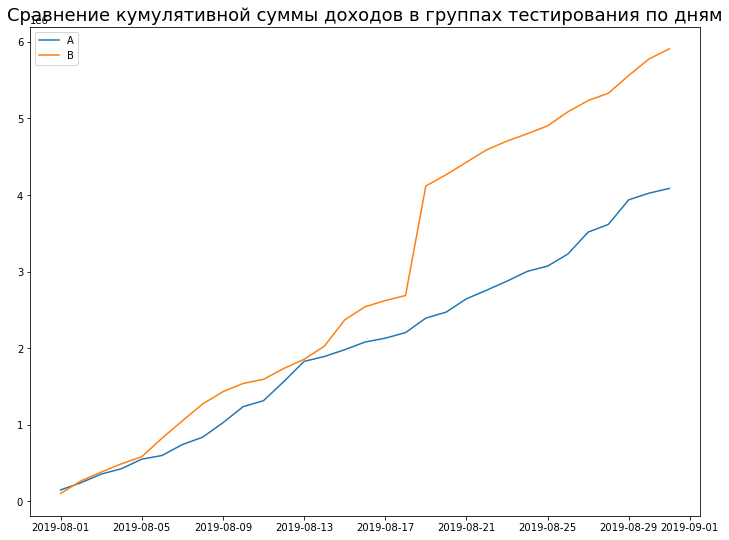

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(12, 9))
plt.plot(orders_A_cummulative['date'], orders_A_cummulative['revenue_per_date_A'], label='A')
plt.plot(orders_B_cummulative['date'], orders_B_cummulative['revenue_per_date_B'], label='B')
plt.title('Сравнение кумулятивной суммы доходов в группах тестирования по дням', fontsize=18)
plt.legend()
plt.show()

Видим, что выручка равномерно увеличивается, но в группе **B** явно есть выброс, это большое количество заказов или один большой заказ.  
Посмотрим как менялась динамика средних чеков в каждой из групп.

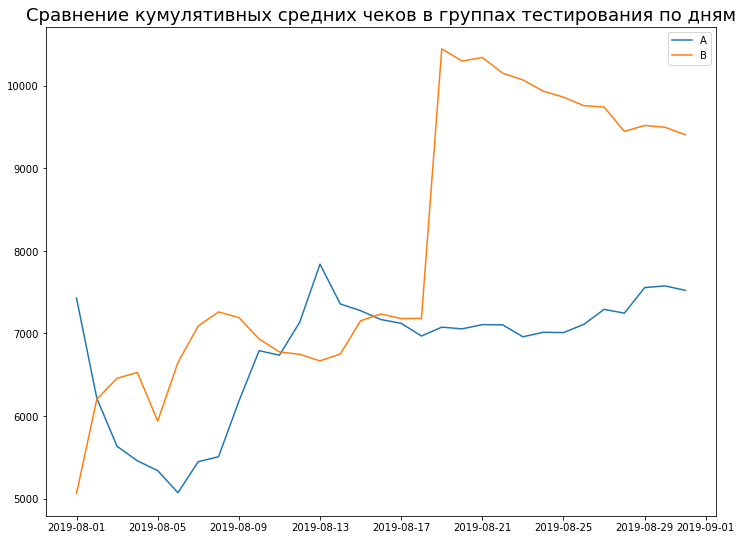

In [17]:
plt.figure(figsize=(12, 9))
plt.plot(orders_A_cummulative['date'], 
         orders_A_cummulative['revenue_per_date_A']/orders_A_cummulative['orders_per_date_A'], 
         label='A')
plt.plot(orders_B_cummulative['date'], 
         orders_B_cummulative['revenue_per_date_B']/orders_B_cummulative['orders_per_date_B'], 
         label='B')
plt.title('Сравнение кумулятивных средних чеков в группах тестирования по дням', fontsize=18)
plt.legend()
plt.show()

Ближе к концу теста графики примерно выравниваются, однако в группе **B** этому мешает тот же выброс, что и на прошлом графике.  
Построим график относительного изменения кумулятивного среднего чека группы **B** к группе **A**.

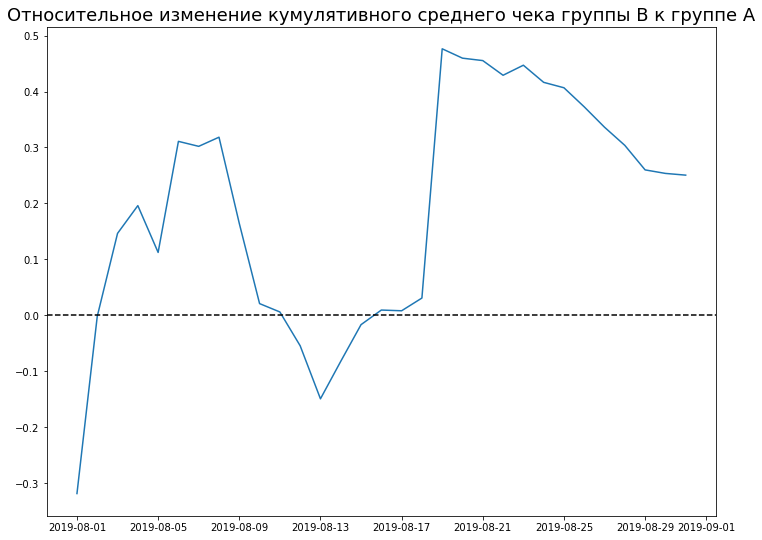

In [18]:
plt.figure(figsize=(12, 9))
plt.plot(orders_A_cummulative['date'], 
         (orders_B_cummulative['revenue_per_date_B']/orders_B_cummulative['orders_per_date_B'])/
         (orders_A_cummulative['revenue_per_date_A']/orders_A_cummulative['orders_per_date_A'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=18)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Теория о выбросе подтверждается - это один большой заказ, т.к. он отражается на среднем чеке. Вместо выравнивания, график имеет "скачок", примерно 19-20 августа.

Сравним на графике кумулятивную конверсию для разных групп. Для этого, сначала её рассчитаем.

In [19]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

visitors_A_daily.rename(columns={'visitors':'visitors_per_date_A'}, inplace=True)
visitors_B_daily.rename(columns={'visitors':'visitors_per_date_B'}, inplace=True)

visitors_A_cummulative = visitors_A_daily.apply(lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_A': 'sum'}), axis=1).sort_values(by=['date'])
visitors_B_cummulative = visitors_B_daily.apply(lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_B': 'sum'}), axis=1).sort_values(by=['date'])

group_A_cummulative = orders_A_cummulative.merge(visitors_A_cummulative, on='date', how='left')
group_B_cummulative = orders_B_cummulative.merge(visitors_B_cummulative, on='date', how='left')

group_A_cummulative['conversion_A'] = group_A_cummulative['orders_per_date_A']/group_A_cummulative['visitors_per_date_A'] 
group_B_cummulative['conversion_B'] = group_B_cummulative['orders_per_date_B']/group_B_cummulative['visitors_per_date_B']

Теперь построим график.

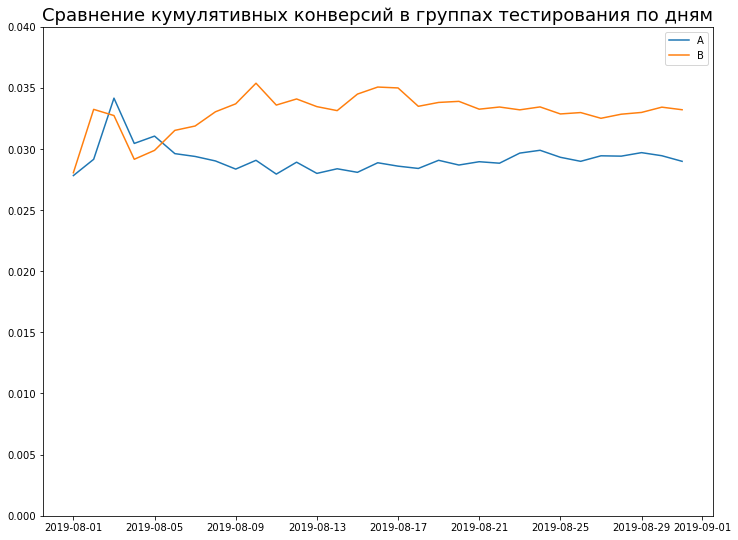

In [20]:
plt.figure(figsize=(12, 9))
plt.plot(group_A_cummulative['date'], group_A_cummulative['conversion_A'], label='A')
plt.plot(group_B_cummulative['date'], group_B_cummulative['conversion_B'], label='B')
plt.title('Сравнение кумулятивных конверсий в группах тестирования по дням', fontsize=18)
plt.ylim(0, 0.04)
plt.legend()
plt.show()

В начале обе группы имели всплески, однако ближе к концу тестирования показатели почти стабилизировались.

Так же построим график относительного изменения кумулятивной конверсии группы **B** к группе **A**. Для этого сначала объединим данные в одну таблицу.

In [21]:
cummulative_data = group_A_cummulative.merge(group_B_cummulative, on='date', how='left')
display(cummulative_data.head())
print(cummulative_data.info())

,date,orders_per_date_A,revenue_per_date_A,visitors_per_date_A,conversion_A,orders_per_date_B,revenue_per_date_B,visitors_per_date_B,conversion_B
0,2019-08-01,20,148579,719,0.027816,20,101217,713,0.028050
1,2019-08-02,39,242401,1338,0.029148,43,266748,1294,0.033230
2,2019-08-03,63,354874,1845,0.034146,59,380996,1803,0.032723
3,2019-08-04,78,425699,2562,0.030445,75,489567,2573,0.029149
4,2019-08-05,103,549917,3318,0.031043,98,581995,3280,0.029878


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 31 non-null     datetime64[ns]
 1   orders_per_date_A    31 non-null     int64         
 2   revenue_per_date_A   31 non-null     int64         
 3   visitors_per_date_A  31 non-null     int64         
 4   conversion_A         31 non-null     float64       
 5   orders_per_date_B    31 non-null     int64         
 6   revenue_per_date_B   31 non-null     int64         
 7   visitors_per_date_B  31 non-null     int64         
 8   conversion_B         31 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 2.4 KB
None


Теперь построим график.

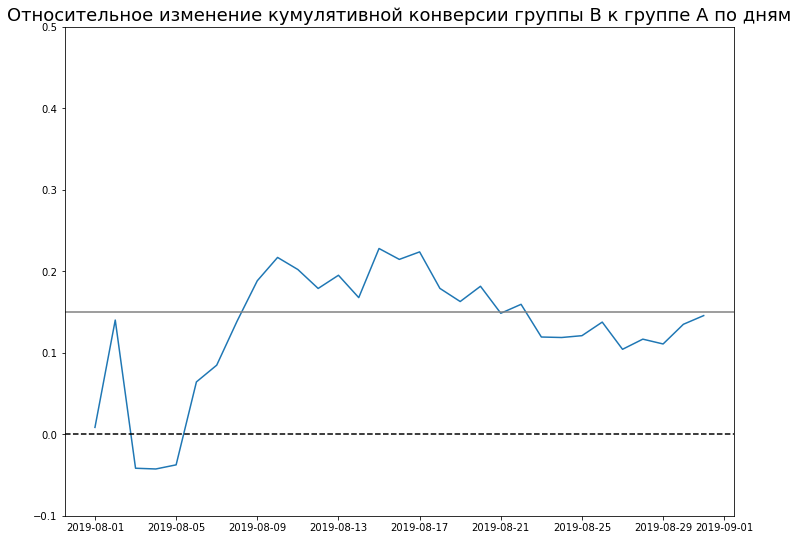

In [22]:
plt.figure(figsize=(12, 9))
plt.plot(cummulative_data['date'], cummulative_data['conversion_B']/cummulative_data['conversion_A']-1)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A по дням', fontsize=18)
plt.ylim(-0.1, 0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='-')
plt.show()

В первые 10 дней наблюдаются резкие скачки, однако после этого график устойчиво снижается. Можно сказать, что отношение конверсии не установилось окончательно. Предполагаю, что оно произойдёт около значения 0,15 (для этого добавил дополнительную ось). Так же сначала нам стоит проанализировать аномалии.

Сгруппируем данные таблицы заказов по покупателям и узнаем количество заказов для каждого покупателя.

In [23]:
orders_per_users = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})

Построим график (скаттерплот) для наглядности распределения значений.

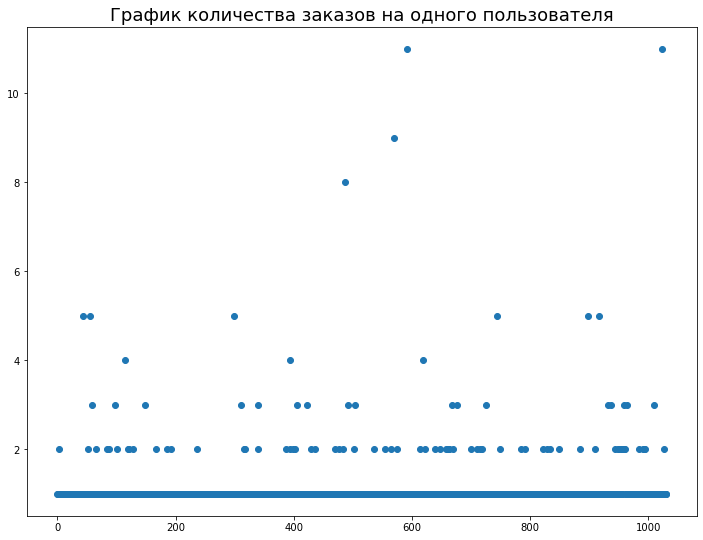

In [24]:
x_values = pd.Series(range(0, len(orders_per_users)))
plt.figure(figsize=(12, 9))
plt.scatter(x_values, orders_per_users['transactionId'])
plt.title('График количества заказов на одного пользователя', fontsize=18)
plt.show()

Более 5-ти заказов сделали всего 4 пользователя. В целом мало кто из пользователей делает более одного заказа, и как правило ограничивается двумя-тремя.

Посчитаем 95 и 99 перцентили для получения более точных данных.

In [25]:
print(np.percentile(orders_per_users['transactionId'], [95, 99]))

[2. 4.]


Не более 5% пользователей делает более 2-х заказов, и не более 1% пользователей делает более 4-х заказов. Возьмём за границу 2 заказа.

Аналогично составим график и посчитаем перцентили для стоимости заказов.

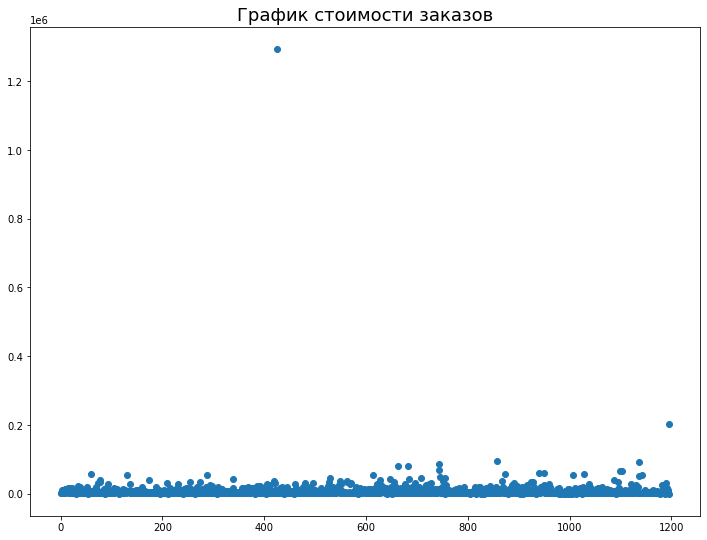

In [26]:
x_values_2 = pd.Series(range(0, len(orders)))
plt.figure(figsize=(12, 9))
plt.scatter(x_values_2, orders['revenue'])
plt.title('График стоимости заказов', fontsize=18)
plt.show()

Слишком плотно к низу сгруппированы значения. Причина - разброс значений по оси Y слишком велик. Уменьшим масштаб, для более наглядной картины.

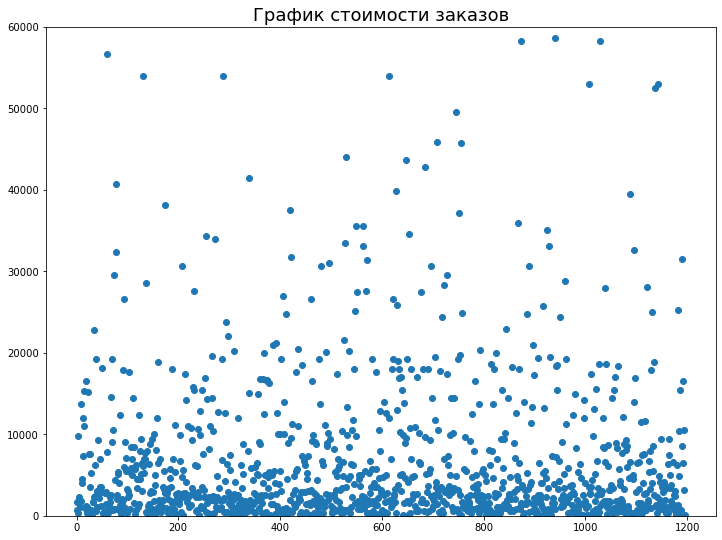

In [27]:
x_values_2 = pd.Series(range(0, len(orders)))
plt.figure(figsize=(12, 9))
plt.scatter(x_values_2, orders['revenue'])
plt.ylim(0, 60000)
plt.title('График стоимости заказов', fontsize=18)
plt.show()

Так выглядит понятнее. Значения разбросаны довольно сильно, однако большая их часть в пределах 20 000.  
Для более точных данных рассчитаем перцентили.

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Стоимость 5% заказов превышает 28000, стоимость 1% заказов превышает 58 233. Определим порог как 28 000.  

Далее нам необходимо рассчитать статистическую значимость различий в конверсии для "сырых" данных.

In [29]:
orders_by_users_A = (orders[orders['group'] == 'A']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId': pd.Series.nunique}))
orders_by_users_B = (orders[orders['group'] == 'B']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId': pd.Series.nunique}))

orders_by_users_A.rename(columns = {'transactionId':'orders', 'visitorId':'user_id'}, inplace=True)
orders_by_users_B.rename(columns = {'transactionId':'orders', 'visitorId':'user_id'}, inplace=True)

Теперь узнаем сколько посетителей были покупателями. Поскольку данные о визитах собраны по дням, сгруппируем заказы так же по дням, посчитаем количество уникальных поьзователей за каждый день, и суммируем.

In [30]:
buyers_A = orders[orders['group'] == 'A'].groupby('date').agg({'visitorId':'nunique'})['visitorId'].sum()
buyers_B = orders[orders['group'] == 'B'].groupby('date').agg({'visitorId':'nunique'})['visitorId'].sum()

In [31]:
sample_A = pd.concat([orders_by_users_A['orders'], 
                     pd.Series(0, index=np.arange(visitors_A_daily['visitors_per_date_A'].sum() - buyers_A), 
                               name='orders')], axis=0)

sample_B = pd.concat([orders_by_users_B['orders'], 
                     pd.Series(0, index=np.arange(visitors_B_daily['visitors_per_date_B'].sum() - buyers_B), 
                               name='orders')], axis=0)

Теперь узнаем значение ***p-value***, а так же относительный прирост/спад заказов в группе **B** относительно контрольной группы.  
Для удобства опишем это функцией. Для проверки статистически значимых различий используем критерий Манна-Уитни. Для проверки двусторонних гипотез параметр **alternative** установим как *'two-sided'*.

In [32]:
def mann_whit(massive_1, massive_2):
    a = st.mannwhitneyu(massive_1, massive_2, alternative='two-sided')
    b = massive_2.mean()/massive_1.mean() - 1
    print('P-значение равно {0:.3f}'.format(a[1]))
    print('Относительная разница средних значений группы B по отношению к группе A {0:.3f}'.format(b))

Теперь вызовем её с нужными параметрами.  
Нулевая гиоптеза **Ho** гласит, что сравниваемые величины (количества заказов одним покупателем) равны, следовательно, статистически значимых различий между ними нет. Альтернативная гипотеза предполагает, что они различаются.

In [33]:
mann_whit(sample_A, sample_B)

P-значение равно 0.017
Относительная разница средних значений группы B по отношению к группе A 0.138


Поскольку ***p-value*** менее 0.05, отвергаем нулевую гипотезу (об отсутствии статистически значимых различий) и имеем основания считать, что в данных есть статистически значимые различия.  
Относительный прирост заказов в группе **B** равен почти 14%, значит и в абсолютных цифрах увеличение есть.

Таким же образом рассчитаем статистическую значимость различий в среднем чеке между группами, и найдем изменение значений группы **B** по сравнению с группой **A**.  
Нулевая гипотеза **Ho** утверждает, что средний размер чеков в контрольной и тестовой группах одинаков. Альтернативная гипотеза (**H1**), что их размер различается.

In [34]:
mann_whit(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])

P-значение равно 0.729
Относительная разница средних значений группы B по отношению к группе A 0.259


**P-value** сильно больше 0.05. Значит, причин отвергать нулевую гипотезу (об отсутствии различий в средних чеках разных групп) у нас нет.  
Так же тут мы видим, что средний чек группы **B** превышает средний чек группы **A** почти на 26%.

Теперь проверим чистые данные. Для этого, сначала мы соберём Id всех пользователей, значения по которым отклоняются от общих трендов.

In [35]:
users_many_orders = orders_per_users[orders_per_users['transactionId'] > 2]['visitorId']

users_expensive_orders = orders[orders['revenue'] > 28000]['visitorId']

not_our_users = (pd.concat([users_many_orders, users_expensive_orders], axis=0).drop_duplicates())

print(not_our_users.head(5))
print(not_our_users.shape) 

44     199603092
55     237748145
59     249864742
97     393266494
114    457167155
Name: visitorId, dtype: int64
(83,)


Набралось 83 пользователя. Если бы были взяты другие пороговые значения, их было бы меньше.  
Теперь отфильтруем данные. Заново сформируем таблицы с новыми вводными

In [36]:
orders_by_users_A_filt = (orders[(orders['group'] == 'A') & (np.logical_not(orders['visitorId'].isin(not_our_users)))][
    ['transactionId', 'visitorId']]
                          .groupby('visitorId', as_index=False)
                          .agg({'transactionId': pd.Series.nunique}))

orders_by_users_A_filt.rename(columns={'visitorId':'user_id', 'transactionId':'orders', 'revenue':'revenue_A'}, 
                              inplace=True)


orders_by_users_B_filt = (orders[(orders['group'] == 'B') & (np.logical_not(orders['visitorId'].isin(not_our_users)))][
    ['transactionId', 'visitorId']]
                          .groupby('visitorId', as_index=False)
                          .agg({'transactionId': pd.Series.nunique}))

orders_by_users_B_filt.rename(columns={'visitorId':'user_id', 'transactionId':'orders', 'revenue':'revenue_B'}, 
                              inplace=True)

Рассчитаем количество покупателей по дням для каждой из групп, чтобы узнать количество "чистых" и "полезных" посетителей.

In [37]:
buyers_A_filt = orders[(orders['group'] == 'A') & (np.logical_not(orders['visitorId'].isin(not_our_users)))][
    ['date', 'visitorId']].groupby('date').agg({'visitorId': 'nunique'})['visitorId'].sum()

buyers_B_filt = orders[(orders['group'] == 'B') & (np.logical_not(orders['visitorId'].isin(not_our_users)))][
    ['date', 'visitorId']].groupby('date').agg({'visitorId': 'nunique'})['visitorId'].sum()

In [38]:
sample_A_filt = pd.concat([orders_by_users_A_filt['orders'],
                           pd.Series(0, index=np.arange(visitors_A_daily['visitors_per_date_A'].sum() - 
                                                        buyers_A_filt),
                                     name='orders')], axis=0)


sample_B_filt = pd.concat([orders_by_users_B_filt['orders'],
                           pd.Series(0, index=np.arange(visitors_B_daily['visitors_per_date_B'].sum() - 
                                                        buyers_B_filt),
                                     name='orders')], axis=0)

Проведём тест и проверим изменения.

In [39]:
mann_whit(sample_A_filt, sample_B_filt)

P-значение равно 0.012
Относительная разница средних значений группы B по отношению к группе A 0.176


Результат не изменился - **p-value** ниже 0.05, и у нас по-прежнему есть статистически значимые различия, мы можем отвергнуть нулевую гипотезу и считать, что количество заказов производимое покупателями тестовой и контрольной группы различаются.  
А относительный прирост заказов в группе **B** вырос с **13.8** до **17.6** процентов. Следовательно, **значимый рост есть**.

Теперь попробуем рассчитать для "чистых" данных различия в среднем чеке между группами.

In [40]:
mann_whit(orders[(orders['group'] == 'A') & (np.logical_not(orders['visitorId'].isin(not_our_users)))]['revenue'], 
          orders[(orders['group'] == 'B') & (np.logical_not(orders['visitorId'].isin(not_our_users)))]['revenue'])

P-значение равно 0.753
Относительная разница средних значений группы B по отношению к группе A -0.022


**P-value** немного увеличился. Причин отвергать нулевую гипотезу у нас по-прежнему нет.
А вот средний чек группы **B** теперь меньше среднего чека группы **A**, но всего на 2.2%.

---
### Решение по результатам теста.

После проведения анализа решаю остановить тест и признать победу группы **B**, так как:
- Есть статистически значимое различие по конверсии между группами. Как по «сырым» данным, так и после фильтрации.
- Статистически значимого различия по среднему чеку (как по «сырым», так и по данным после фильтрации аномалий) между группами нет. То есть, продаж стало больше, хоть их размер и не вырос. Для целей увеличения выручки - это успех.
- Графики конверсий стабилизировались, и зафиксировались.
- Графики среднего чека почти устоялись и в них уже вряд ли произойдут серьёзные изменения.